In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from sklearn import metrics,preprocessing
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

# Load data

In [9]:
directory = os.fsencode('../data/')

location = True  #range location
mean_dopp = False  #mean of doppler spectrum
var_dopp = True  #variance of doppler spectrum, normalized by total power and square of number of bins
SPC_Hi = True  #scattering point cloud, high threshold
SPD = True #scattering point difference, high threshold
MDR = True #magnitude difference rate
strength = True #sum of doppler spectrum
max_dev = True #deviation from maximum in doppler spectrum (maybe same as var_dopp)
SPC_Lo = True #scattering point cloud, low threshold
peak_count = True #peak count
std_deviation = True #var_dopp difference rate
harmonic_power_content = True #power content of minor peaks in doppler spectrum
frame_counter = False #frame reference of each sample, just for visualization, not a feature
correlation = True
max_to_mean_distance = True
peak_strength_std = False
Lo_peak_count = True
Lo_harmonic_power_content = True
SPC_Mi = True
Lo_skewness = True
Lo_skewness_variation = True
Hi_deviation = True
Hi_deviation_difference = True
Mi_peak_count = True
Mi_harmonic_power_content = True
Mi_skewness = True
Mi_skewness_difference = True
Hi_skewness = True
Hi_skewness_difference = True
Lo_skewness_mean = True
Side_lobe_strength = True
Side_lobe_max_strength = True
SPC_Lo_skewness = True
SPC_Mi_Hi_skewness = True
SPC_Mi_variance = True



feature_list = {'location':location,'mean_dopp':mean_dopp,'var_dopp':var_dopp,'SPC_Hi':SPC_Hi,'SPD':SPD,\
                'MDR':MDR,'strength':strength,'max_dev':max_dev,'SPC_Lo':SPC_Lo,'peak_count':peak_count,\
               'std_deviation':std_deviation,'harmonic_power_content':harmonic_power_content,'frame_counter':frame_counter,\
                'correlation':correlation,'max_to_mean_distance':max_to_mean_distance,'peak_strength_std':peak_strength_std,\
                'Lo_peak_count':Lo_peak_count,'Lo_harmonic_power_content':Lo_harmonic_power_content,"SPC_Mi":SPC_Mi,"Lo_skewness":Lo_skewness,\
                "Lo_skewness_variation":Lo_skewness_variation,"Hi_deviation":Hi_deviation,"Hi_deviation_difference":Hi_deviation_difference,\
               'Mi_peak_count':Mi_peak_count,'Mi_harmonic_power_content':Mi_harmonic_power_content,'Mi_skewness':Mi_skewness,\
                'Mi_skewness_difference':Mi_skewness_difference,'Hi_skewness':Hi_skewness,'Hi_skewness_difference':Hi_skewness_difference,\
               'Lo_skewness_mean':Lo_skewness_mean,'Side_lobe_strength': Side_lobe_strength,'Side_lobe_max_strength':Side_lobe_max_strength,\
               'SPC_Lo_skewness':SPC_Lo_skewness, 'SPC_Mi_Hi_skewness':SPC_Mi_Hi_skewness,'SPC_Mi_variance':SPC_Mi_variance}

class_number = 3
X = []
y = []
files = []
y = np.empty(1)
features = np.array([location, mean_dopp, var_dopp, SPC_Hi, SPD, MDR, strength, max_dev, SPC_Lo, peak_count, std_deviation, harmonic_power_content,\
                     frame_counter, correlation, max_to_mean_distance, peak_strength_std, Lo_peak_count, Lo_harmonic_power_content,SPC_Mi,Lo_skewness,\
                     Lo_skewness_variation,Hi_deviation,Hi_deviation_difference,Mi_peak_count,Mi_harmonic_power_content,Mi_skewness,Mi_skewness_difference,\
                    Hi_skewness,Hi_skewness_difference,Lo_skewness_mean,Side_lobe_strength,Side_lobe_max_strength,SPC_Lo_skewness,\
                    SPC_Mi_Hi_skewness,SPC_Mi_variance])
file_number = 0
X = np.zeros((1,sum(features)))



BORESIGHT = 1
ALL = 0


for file in sorted(os.listdir(directory)):
    filename = os.fsdecode(file)
    if filename.find('walking_diagonal_1_Dataset_1') == -1:
        if BORESIGHT:
            if filename.find('boresight_1') != -1 or filename.find('boresight_2') != -1:
                path = os.path.join(os.fsdecode(directory), filename)
                #print(path)                    
                data = pd.read_csv(path, sep='\t', header=None)
                #print(data.values[:,:].shape)
                X = np.append(X,data.values[:,features], axis=0)
                if filename.startswith('walking_boresight'):
                    i = 0
                elif filename.startswith('biking_boresight'):
                    i = 1
                elif filename.startswith('driving_boresight'):
                    i = 2
                elif filename.startswith('walking_diagonal'):
                    i = 3
                elif filename.startswith('biking_diagonal'):
                    i = 4
                elif filename.startswith('driving_diagonal'):
                    i = 5
                elif filename.startswith('walking_azimuth'):
                    i = 6
                elif filename.startswith('biking_azimuth'):
                    i = 7
                elif filename.startswith('driving_azimuth'):
                    i = 8
                y = np.append(y,i + np.zeros((data.shape[0],1)))

                file_number += 1
                
        if ALL:
            if (filename.find('boresight_1') != -1 or filename.find('boresight_2') != -1\
                                                               or filename.find('diagonal_1') != -1 or filename.find('diagonal_2') != -1\
                                                               or filename.find('azimuth') != -1) and filename.find('azimuth_2_Dataset_2') == -1:
                path = os.path.join(os.fsdecode(directory), filename)
                #print(path)                    
                data = pd.read_csv(path, sep='\t', header=None)
                #print(data.values[:,:].shape)
                X = np.append(X,data.values[:,features], axis=0)
                if filename.startswith('walking_boresight'):
                    i = 0
                elif filename.startswith('biking_boresight'):
                    i = 1
                elif filename.startswith('driving_boresight'):
                    i = 2
                elif filename.startswith('walking_diagonal'):
                    i = 3
                elif filename.startswith('biking_diagonal'):
                    i = 4
                elif filename.startswith('driving_diagonal'):
                    i = 5
                elif filename.startswith('walking_azimuth'):
                    i = 6
                elif filename.startswith('biking_azimuth'):
                    i = 7
                elif filename.startswith('driving_azimuth'):
                    i = 8
                y = np.append(y,i + np.zeros((data.shape[0],1)))

                file_number += 1
                
X = X[1:,:]
y = y[1:]
y = y - min(y) #reposition y from 0 to ....
print(X.shape)
print(y.shape)
feature_names = []
for feature in feature_list:
    if feature_list[feature] == True:
        feature_names.append(feature)
feature_names = np.array(feature_names)
print(f"Used : {file_number} files")
#for col in range(X.shape[1]):
#    X[:,col] /= max(X[:,col])

#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=100)
#print(X_train.shape)
X_train = X
y_train = y

(938, 32)
(938,)
Used : 12 files


In [10]:
X = []
y = []
i = 0
files = []
y = np.empty(1)
X = np.zeros((1,sum(features)))
file_number = 0
for file in sorted(os.listdir(directory)):
    filename = os.fsdecode(file)
    if filename != 'No_target_out.txt':
        if BORESIGHT:
            if filename.find('boresight_3') != -1:
                path = os.path.join(os.fsdecode(directory), filename)
                #print(path)                    
                data = pd.read_csv(path, sep='\t', header=None)
                #print(data.values[:,:].shape)
                X = np.append(X,data.values[:,features], axis=0)
                if filename.startswith('walking_boresight'):
                    i = 0
                elif filename.startswith('biking_boresight'):
                    i = 1
                elif filename.startswith('driving_boresight'):
                    i = 2
                elif filename.startswith('walking_diagonal'):
                    i = 3
                elif filename.startswith('biking_diagonal'):
                    i = 4
                elif filename.startswith('driving_diagonal'):
                    i = 5
                elif filename.startswith('walking_azimuth'):
                    i = 6
                elif filename.startswith('biking_azimuth'):
                    i = 7
                elif filename.startswith('driving_azimuth'):
                    i = 8
                y = np.append(y,i + np.zeros((data.shape[0],1)))

                file_number += 1
        if ALL:
            if(filename.find('boresight_3') != -1 or filename.find('diagonal_3') != -1 or filename.find('azimuth_2_Dataset_2') != -1):
                file_number += 1
                path = os.path.join(os.fsdecode(directory), filename)
                #print(path)                    
                data = pd.read_csv(path, sep='\t', header=None)
                #print(data.values[:,:].shape)
                X = np.append(X,data.values[:,features], axis=0)
                if filename.startswith('walking_boresight'):
                    i = 0
                elif filename.startswith('biking_boresight'):
                    i = 1
                elif filename.startswith('driving_boresight'):
                    i = 2
                elif filename.startswith('walking_diagonal'):
                    i = 3
                elif filename.startswith('biking_diagonal'):
                    i = 4
                elif filename.startswith('driving_diagonal'):
                    i = 5
                elif filename.startswith('walking_azimuth'):
                    i = 6
                elif filename.startswith('biking_azimuth'):
                    i = 7
                elif filename.startswith('driving_azimuth'):
                    i = 8
                y = np.append(y,i + np.zeros((data.shape[0],1)))
X = X[1:,:]#/max(np.amax(dataset, axis = 0))
y = y[1:]
y = y - min(y)
print(X.shape)
print(y.shape)
X_test = X
y_test = y
print(f"Used : {file_number} files")

(437, 32)
(437,)
Used : 6 files


In [11]:
### Normalize dataset
X_dataset = np.append(X_train,X_test,axis=0)
scaler = preprocessing.StandardScaler().fit(X_dataset)
mean = scaler.mean_
scale = scaler.scale_
X_scaled = scaler.transform(X_dataset)
X_train = X_scaled[:len(y_train),:]
X_test = X_scaled[len(y_train):,:]
data_to_file = pd.DataFrame([mean,scale])
print(data_to_file)

#data_to_file = pd.DataFrame([mean,scale])
#print(X_train.shape)

         0         1         2         3         4           5         6   \
0  0.530817  0.303253  0.063429  0.033693  0.543126  208.325026  0.111644   
1  0.207794  0.092612  0.045296  0.038714  0.619770  159.409419  0.025846   

         7         8         9   ...        22        23        24        25  \
0  0.297581  2.405818  0.073986  ...  0.000495  0.013567  0.000991  0.005801   
1  0.172259  2.663907  0.057437  ...  0.020598  0.022504  0.012516  0.016468   

         26        27        28        29        30        31  
0 -0.002439  0.577129  0.550014 -0.020036  0.063788  0.816142  
1  0.010985  0.116736  0.072482  0.157584  0.945576  0.929992  

[2 rows x 32 columns]


In [12]:
asd = pd.read_csv("Trained_stuff/Boresight.csv",delimiter='\t')
d = asd.to_dict("split")

my_dictionary_list = []
for row_idx in range(len(d['data'])):
    for col_idx in range(len(d['columns'])):
        if d['columns'][col_idx] == 'support':
            split_bools = d['data'][row_idx][col_idx] = d['data'][row_idx][col_idx].replace("\n", "").replace("  "," ").replace("[","").replace("]","").split(" ")
            d['data'][row_idx][col_idx] = []
            for elem in split_bools:
                if elem == 'True':
                    d['data'][row_idx][col_idx].append(True)
                elif elem == 'False':
                    d['data'][row_idx][col_idx].append(False)
    best_params= dict(zip(d["columns"],d["data"][row_idx]))
    best_params[d['columns'][col_idx]] = d['data']
    my_dictionary_list.append(best_params)

In [13]:
overall_best_params_xgb = {'score':0}
standard_deviation = []
test_scores = []
cv_scores = []
u = 0
for elem in my_dictionary_list:
    u += 1
    print(f"Number of features: {u}")
    print(elem["features"])
    print(f"Cross-validation set score: {elem['score']}")
    if elem["score"] > overall_best_params_xgb["score"]:
        overall_best_params_xgb["score"] = elem["score"]
        overall_best_params_xgb["features"] = elem["features"]
        overall_best_params_xgb["max_depth"] = elem["max_depth"]
        overall_best_params_xgb["gamma"] = elem["gamma"]
        overall_best_params_xgb["eta"] = elem["eta"]
        overall_best_params_xgb["support"] = elem["support"]
    clf = xgb.XGBClassifier(objective='multi:softmax',eval_metric='rmsle',eta=elem['eta'],gamma=elem['gamma'],max_depth=elem['max_depth'],use_label_encoder=False)
    clf.fit(X_train[:,elem["support"]],y_train)
    y_pred = clf.predict(X_test[:,elem["support"]])
    score = metrics.accuracy_score(y_test, y_pred)
    standard_deviation.append(elem['standard_deviation'])
    test_scores.append(score)
    cv_scores.append(elem["score"])
 

Number of features: 1
['Hi_skewness_difference']
Cross-validation set score: 0.7880355276907002
Number of features: 2
['Hi_skewness_difference' 'Side_lobe_strength']
Cross-validation set score: 0.8580944917151815
Number of features: 3
['strength' 'Hi_skewness_difference' 'Side_lobe_strength']
Cross-validation set score: 0.8754030452306315
Number of features: 4
['var_dopp' 'strength' 'Hi_skewness_difference' 'Side_lobe_strength']
Cross-validation set score: 0.9117405582922824
Number of features: 5
['var_dopp' 'strength' 'SPC_Lo' 'Hi_skewness_difference'
 'Side_lobe_strength']
Cross-validation set score: 0.9325085833706525
Number of features: 6
['location' 'var_dopp' 'strength' 'SPC_Lo' 'Hi_skewness_difference'
 'Side_lobe_strength']
Cross-validation set score: 0.9368375876996566
Number of features: 7
['location' 'var_dopp' 'strength' 'SPC_Lo' 'Hi_skewness_difference'
 'Side_lobe_strength' 'SPC_Mi_variance']
Cross-validation set score: 0.9480780713539334
Number of features: 8
['var_dopp'

<ipython-input-8-ca5f75d5ab08>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.round(ax.get_yticks(),2),fontsize=20)



Best score over all: 0.7264023944130362
Features: ['location' 'var_dopp' 'SPC_Hi' 'strength' 'max_dev' 'SPC_Lo'
 'std_deviation' 'harmonic_power_content' 'correlation'
 'max_to_mean_distance' 'Lo_peak_count' 'SPC_Mi' 'Hi_deviation'
 'Mi_peak_count' 'Mi_skewness_difference' 'Hi_skewness_difference'
 'Side_lobe_strength' 'Side_lobe_max_strength' 'SPC_Mi_variance']
Final score: 0.6305220883534136


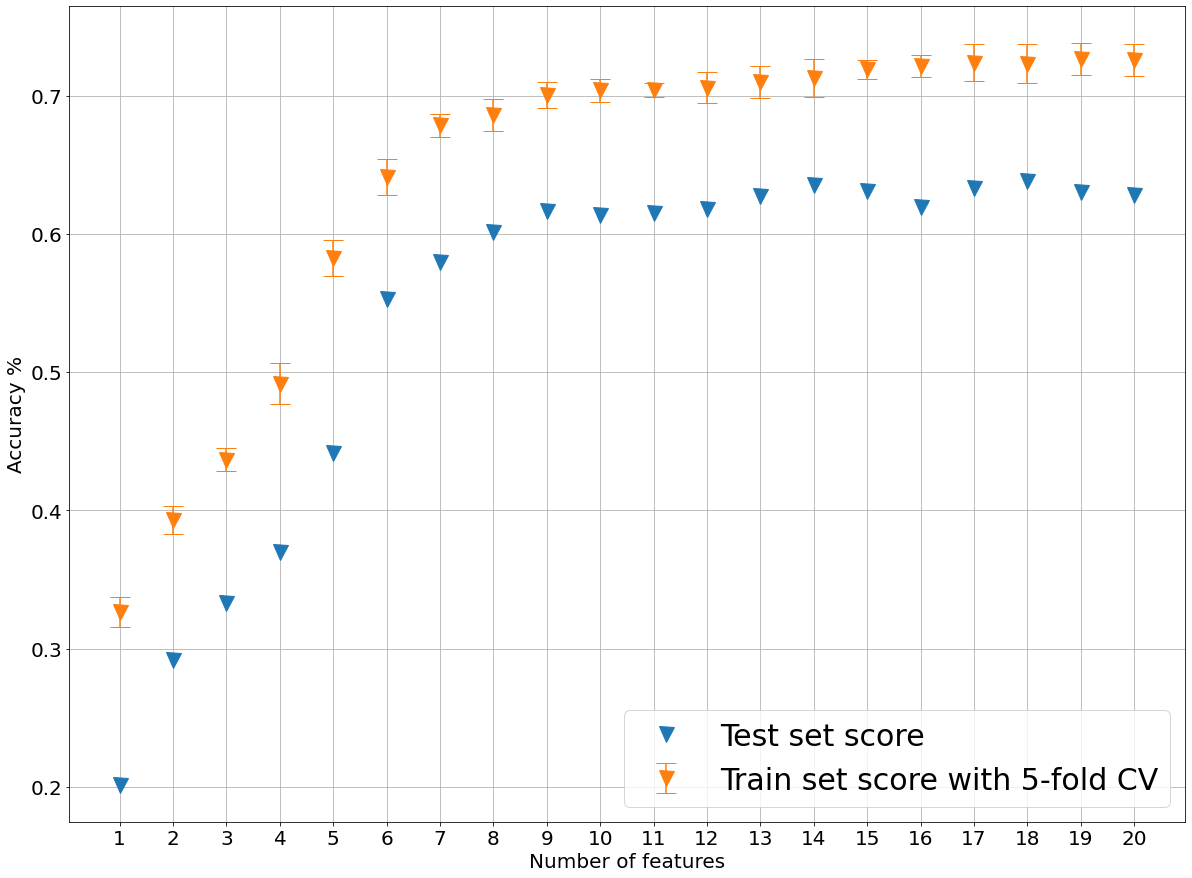

In [8]:
max_features = u
fig,ax = plt.subplots(1,1,figsize=(20,15))
ax.set_xlabel("Number of features",fontsize=20)
ax.set_ylabel("Accuracy %",fontsize=20)
features_number = np.arange(1,max_features+1)
ax.plot(features_number,test_scores, label='Test set score',marker='v',markersize=15,linestyle='none')
ax.errorbar(features_number,cv_scores, yerr=standard_deviation,label='Train set score with 5-fold CV',marker='v',markersize=15,linestyle='none',capsize=10)
ax.legend(fontsize=30)
ax.set_xticks(features_number)
ax.set_xticklabels(ax.get_xticks(),fontsize=20)
ax.set_yticklabels(np.round(ax.get_yticks(),2),fontsize=20)
ax.grid(True)
print()
print("Best score over all: " + str(overall_best_params_xgb["score"]))
print("Features: " + str(overall_best_params_xgb["features"]))
clf = xgb.XGBClassifier(objective='multi:softmax',eval_metric='rmsle',eta=overall_best_params_xgb['eta'],gamma=overall_best_params_xgb['gamma'],max_depth=overall_best_params_xgb['max_depth'],use_label_encoder=False)
clf.fit(X_train[:,overall_best_params_xgb["support"]],y_train)

###Accuracy on test set
y_pred = clf.predict(X_test[:,overall_best_params_xgb["support"]])
score = metrics.accuracy_score(y_test, y_pred)
print(f"Final score: {score}")
#plt.rcParams.update({'font.size': 25})

plt.savefig('Thesis_figures/Feature_VS_Accuracy_ALL_COMPLETE.png',format='png')


In [51]:
asd = pd.read_csv("Trained_stuff/Boresight_Diagonal_azimuth.csv",delimiter='\t')
d = asd.to_dict("split")

###Get dictionary with performance for each number of feature
my_dictionary_list = []
for row_idx in range(len(d['data'])):
    for col_idx in range(len(d['columns'])):
        if d['columns'][col_idx] == 'support':
            split_bools = d['data'][row_idx][col_idx] = d['data'][row_idx][col_idx].replace("\n", "").replace("  "," ").replace("[","").replace("]","").split(" ")
            d['data'][row_idx][col_idx] = []
            for elem in split_bools:
                if elem == 'True':
                    d['data'][row_idx][col_idx].append(True)
                elif elem == 'False':
                    d['data'][row_idx][col_idx].append(False)
    best_params= dict(zip(d["columns"],d["data"][row_idx]))
    best_params[d['columns'][col_idx]] = d['data']
    my_dictionary_list.append(best_params)
###Get best performance    
max_score = 0
support = []
feature_names = []
for elem in my_dictionary_list:
    if elem['score'] > max_score:
        max_score = elem['score']
        support = elem['support']
        feature_names = elem['features'].replace("'","").replace('[','').replace(']','').replace('\n','').split(" ")

<ipython-input-52-9b7ea2665dc3>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + class_names,fontsize=25)
<ipython-input-52-9b7ea2665dc3>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + class_names,fontsize=25)


0.6337349397590362


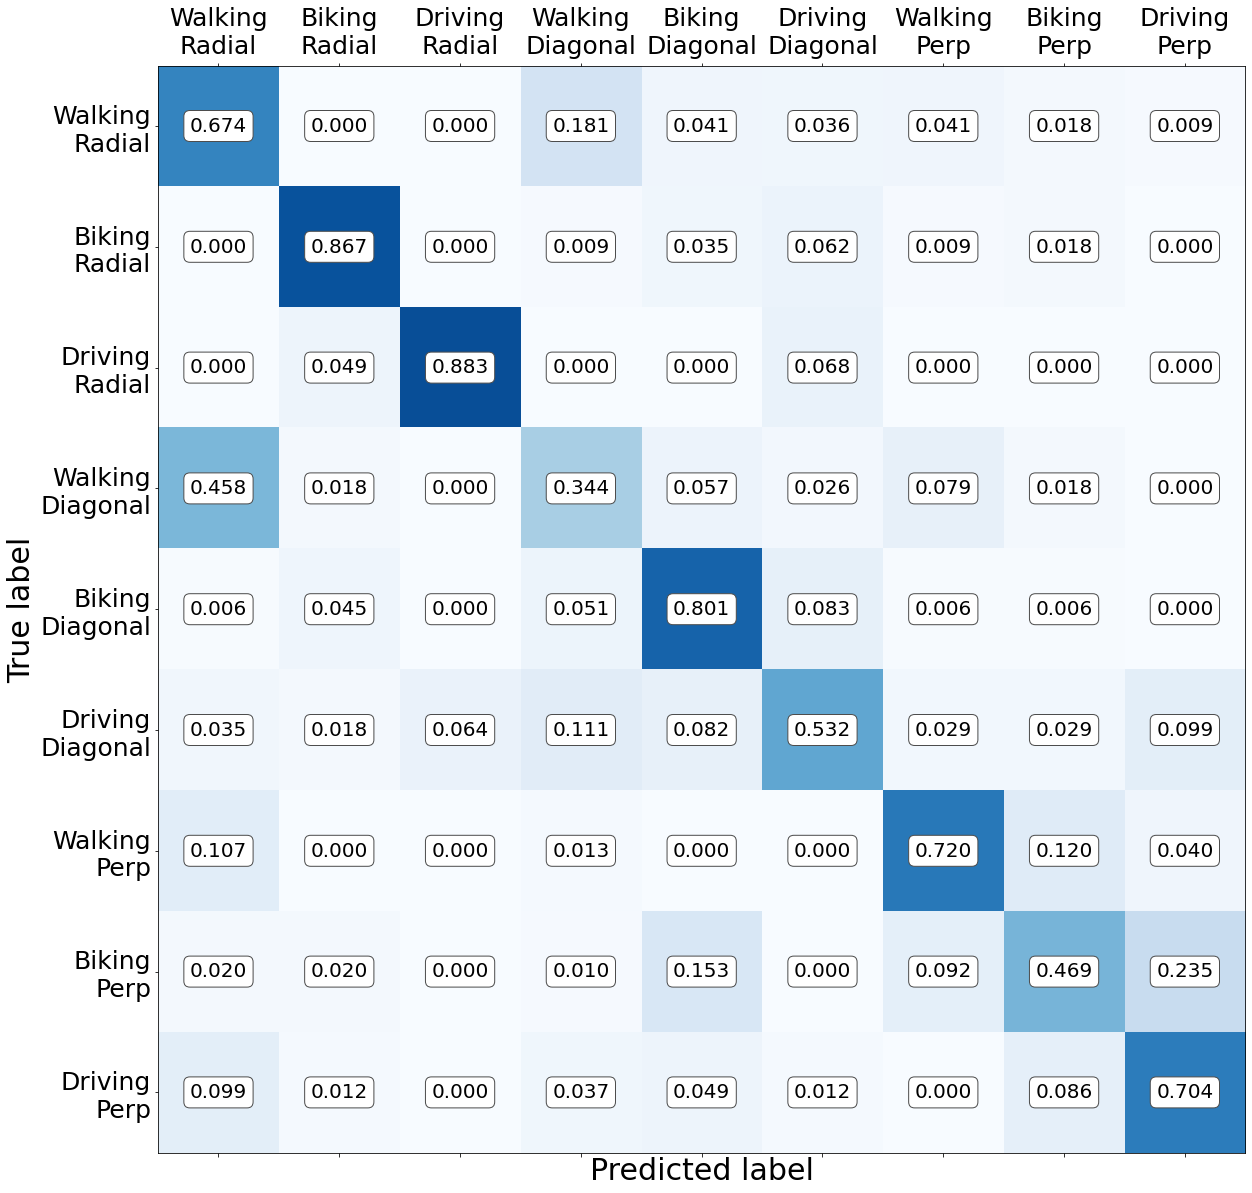

In [52]:
filename = 'boresight_diagonal_azimuth_model.model'
clf.load_model('Trained_stuff/'+filename)
class_names = ['Walking\nRadial','Biking\nRadial','Driving\nRadial',\
               'Walking\nDiagonal','Biking\nDiagonal','Driving\nDiagonal',\
              'Walking\nPerp','Biking\nPerp','Driving\nPerp']
fig,ax = plt.subplots(1,1,figsize=(20,20))
ax.set_xlabel('Predicted label', fontsize=30)
ax.set_ylabel('True label', fontsize=30)
ax.set_xticklabels([''] + class_names,fontsize=25)
ax.set_yticklabels([''] + class_names,fontsize=25)
y_pred = clf.predict(X_test[:,overall_best_params_xgb["support"]])
score = metrics.accuracy_score(y_test, y_pred)
print(score)
plt.rcParams.update({'font.size': 20})
disp = metrics.confusion_matrix(y_test,y_pred, normalize='true')

cax = ax.matshow(disp, interpolation='nearest',cmap=plt.cm.Blues,norm=mpl.colors.Normalize(vmin=0, vmax=1))
for (i, j), z in np.ndenumerate(disp):
    ax.text(j, i, '{:0.3f}'.format(z), ha='center', va='center', fontsize=20,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
#plt.savefig('Thesis_figures/Confusion_Matrix_ALL',format='png')

../data/biking_boresight_3_Dataset_1_statistics.txt
(78, 35)
../data/biking_boresight_3_Dataset_2_statistics.txt
(35, 35)
../data/driving_boresight_3_Dataset_1_statistics.txt
(57, 35)
../data/driving_boresight_3_Dataset_2_statistics.txt
(46, 35)
../data/walking_boresight_3_Dataset_1_statistics.txt
(136, 35)
../data/walking_boresight_3_Dataset_2_statistics.txt
(85, 35)
(437, 32)
(437,)
Used : 6 files


<ipython-input-16-120922b225a4>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_xticklabels(['']+['Walking','Biking','Driving'],fontsize=30)
<ipython-input-16-120922b225a4>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_yticklabels(['']+['Walking','Biking','Driving'],fontsize=30)


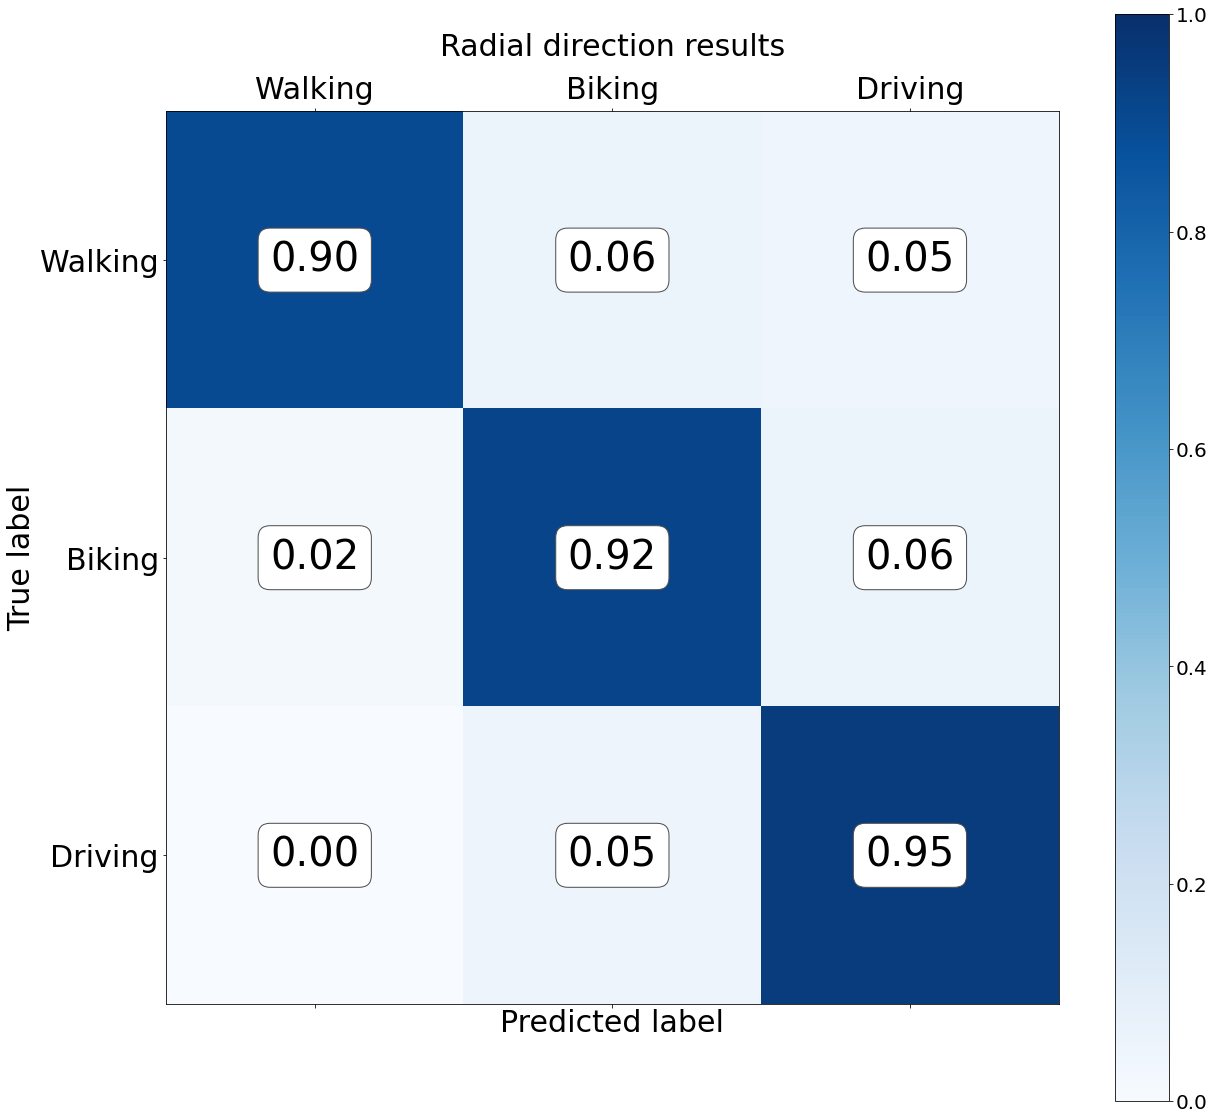

In [16]:
ConfusionMatrix = metrics.confusion_matrix(y_test,y_pred, normalize='true')
confusion_results = [[0, 0, 0] for i in range(len(ConfusionMatrix))]
for diag in range(len(ConfusionMatrix)):
    rolled_row = np.roll(ConfusionMatrix[diag],0)
    for column in range(len(ConfusionMatrix)):
        confusion_results[diag][column%3] += rolled_row[column]
fig,ax = plt.subplots(1,1,figsize=(20,20))
radial_results = confusion_results[0:3]
cax = ax.matshow(radial_results, interpolation='nearest',cmap=plt.cm.Blues,norm=mpl.colors.Normalize(vmin=0, vmax=1))
fig.colorbar(cax)

_=ax.set_ylabel('True label',fontsize=30)
_=ax.set_xlabel('Predicted label',fontsize=30)
_=ax.set_title('Radial direction results', fontsize=30, pad=20)
_=ax.set_xticklabels(['']+['Walking','Biking','Driving'],fontsize=30)
_=ax.set_yticklabels(['']+['Walking','Biking','Driving'],fontsize=30)
for (i, j), z in np.ndenumerate(radial_results):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', fontsize=40,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    
#plt.savefig('Figures/Radial_Performance_Matrix_ALL',format='png')

<ipython-input-39-5728a94c7272>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_xticklabels(['']+['Walking','Biking','Driving'],fontsize=30)
<ipython-input-39-5728a94c7272>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_yticklabels(['']+['Walking','Biking','Driving'],fontsize=30)


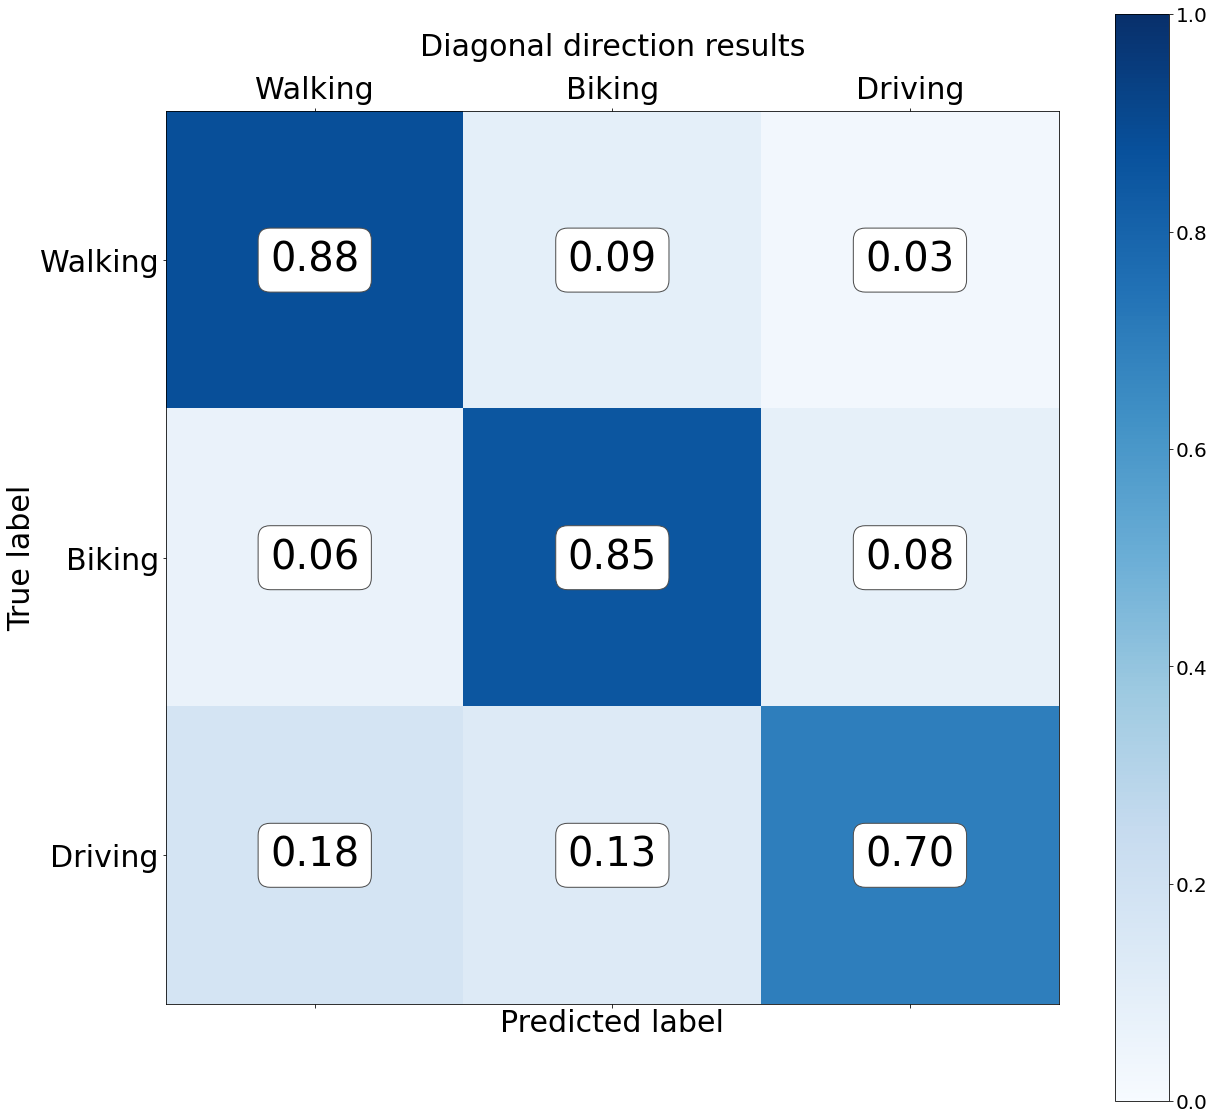

In [39]:
fig,ax = plt.subplots(1,1,figsize=(20,20))
diagonal_results = confusion_results[3:6]
cax = ax.matshow(diagonal_results, interpolation='nearest',cmap=plt.cm.Blues,norm=mpl.colors.Normalize(vmin=0, vmax=1))
fig.colorbar(cax)

_=ax.set_ylabel('True label',fontsize=30)
_=ax.set_xlabel('Predicted label',fontsize=30)
_=ax.set_title('Diagonal direction results', fontsize=30, pad=20)
_=ax.set_xticklabels(['']+['Walking','Biking','Driving'],fontsize=30)
_=ax.set_yticklabels(['']+['Walking','Biking','Driving'],fontsize=30)
for (i, j), z in np.ndenumerate(diagonal_results):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', fontsize=40,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    
#plt.savefig('Figures/Diagonal_Performance_Matrix_ALL',format='png')

<ipython-input-40-0c204ac61914>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_xticklabels(['']+['Walking','Biking','Driving'],fontsize=30)
<ipython-input-40-0c204ac61914>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_yticklabels(['']+['Walking','Biking','Driving'],fontsize=30)


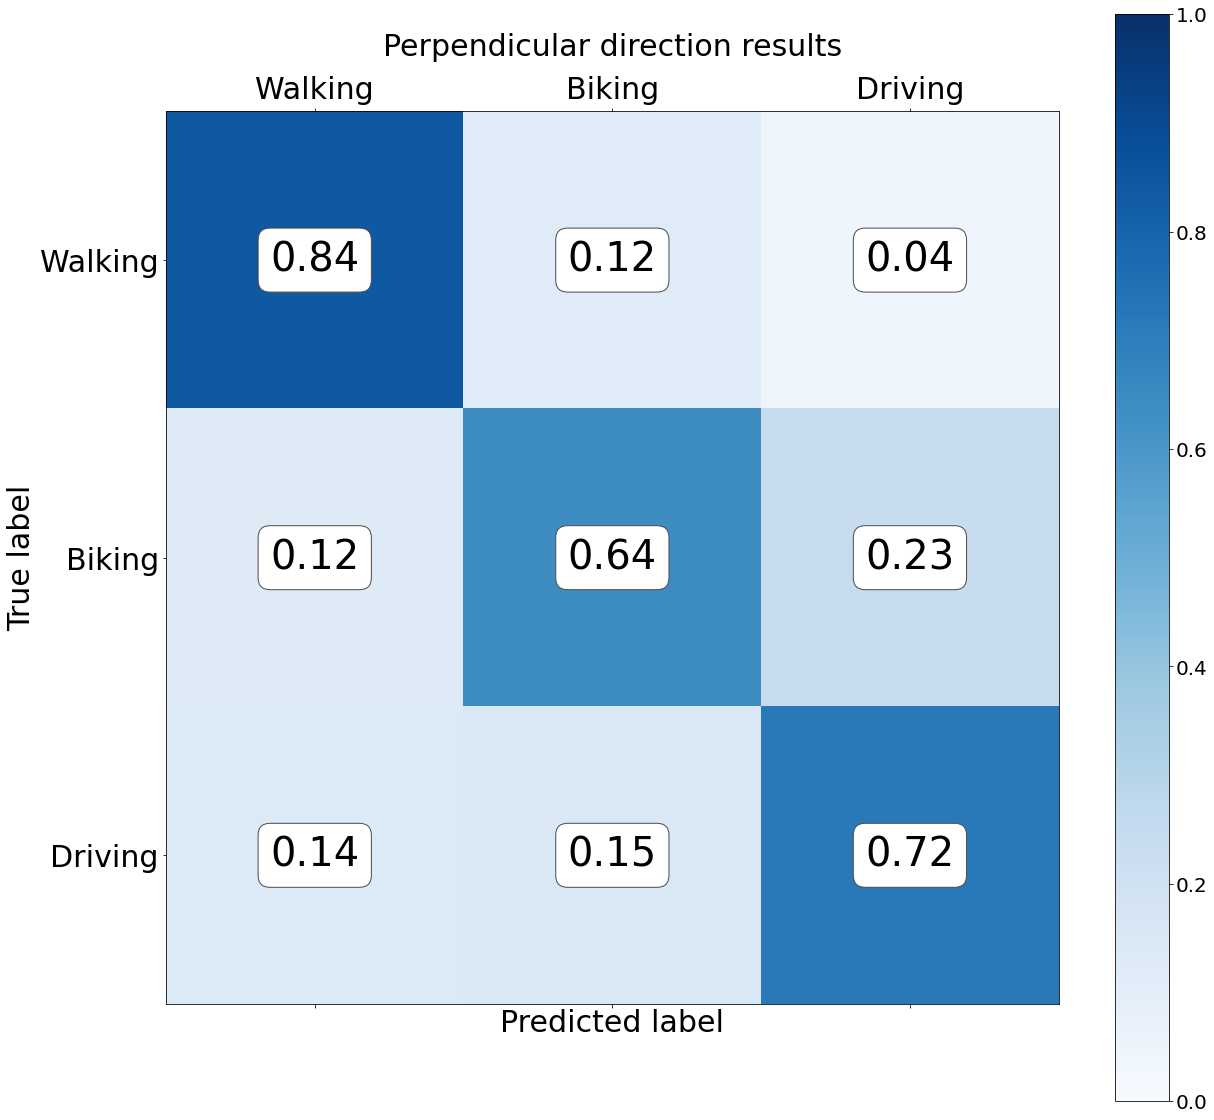

In [40]:
fig,ax = plt.subplots(1,1,figsize=(20,20))
azimuth_results = confusion_results[6:9]
cax = ax.matshow(azimuth_results, interpolation='nearest',cmap=plt.cm.Blues,norm=mpl.colors.Normalize(vmin=0, vmax=1))
fig.colorbar(cax)

_=ax.set_ylabel('True label',fontsize=30)
_=ax.set_xlabel('Predicted label',fontsize=30)
_=ax.set_title('Perpendicular direction results', fontsize=30, pad=20)
_=ax.set_xticklabels(['']+['Walking','Biking','Driving'],fontsize=30)
_=ax.set_yticklabels(['']+['Walking','Biking','Driving'],fontsize=30)
for (i, j), z in np.ndenumerate(azimuth_results):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', fontsize=40,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    
#plt.savefig('Figures/Perpendicular_Performance_Matrix_ALL',format='png')

   Feature  Importance                    Name
0       f0        1704                location
1       f3        1429                strength
2       f8        1016             correlation
3      f14         976  Mi_skewness_difference
4       f9         962    max_to_mean_distance
5       f1         898                var_dopp
6      f16         884      Side_lobe_strength
7       f6         878           std_deviation
8      f15         811  Hi_skewness_difference
9      f11         782                  SPC_Mi
10      f5         753                  SPC_Lo
11     f18         718         SPC_Mi_variance
12      f4         691                 max_dev
13     f17         602  Side_lobe_max_strength
14     f10         483           Lo_peak_count
15      f7         470  harmonic_power_content
16      f2         449                  SPC_Hi
17     f12         432            Hi_deviation
18     f13         354           Mi_peak_count


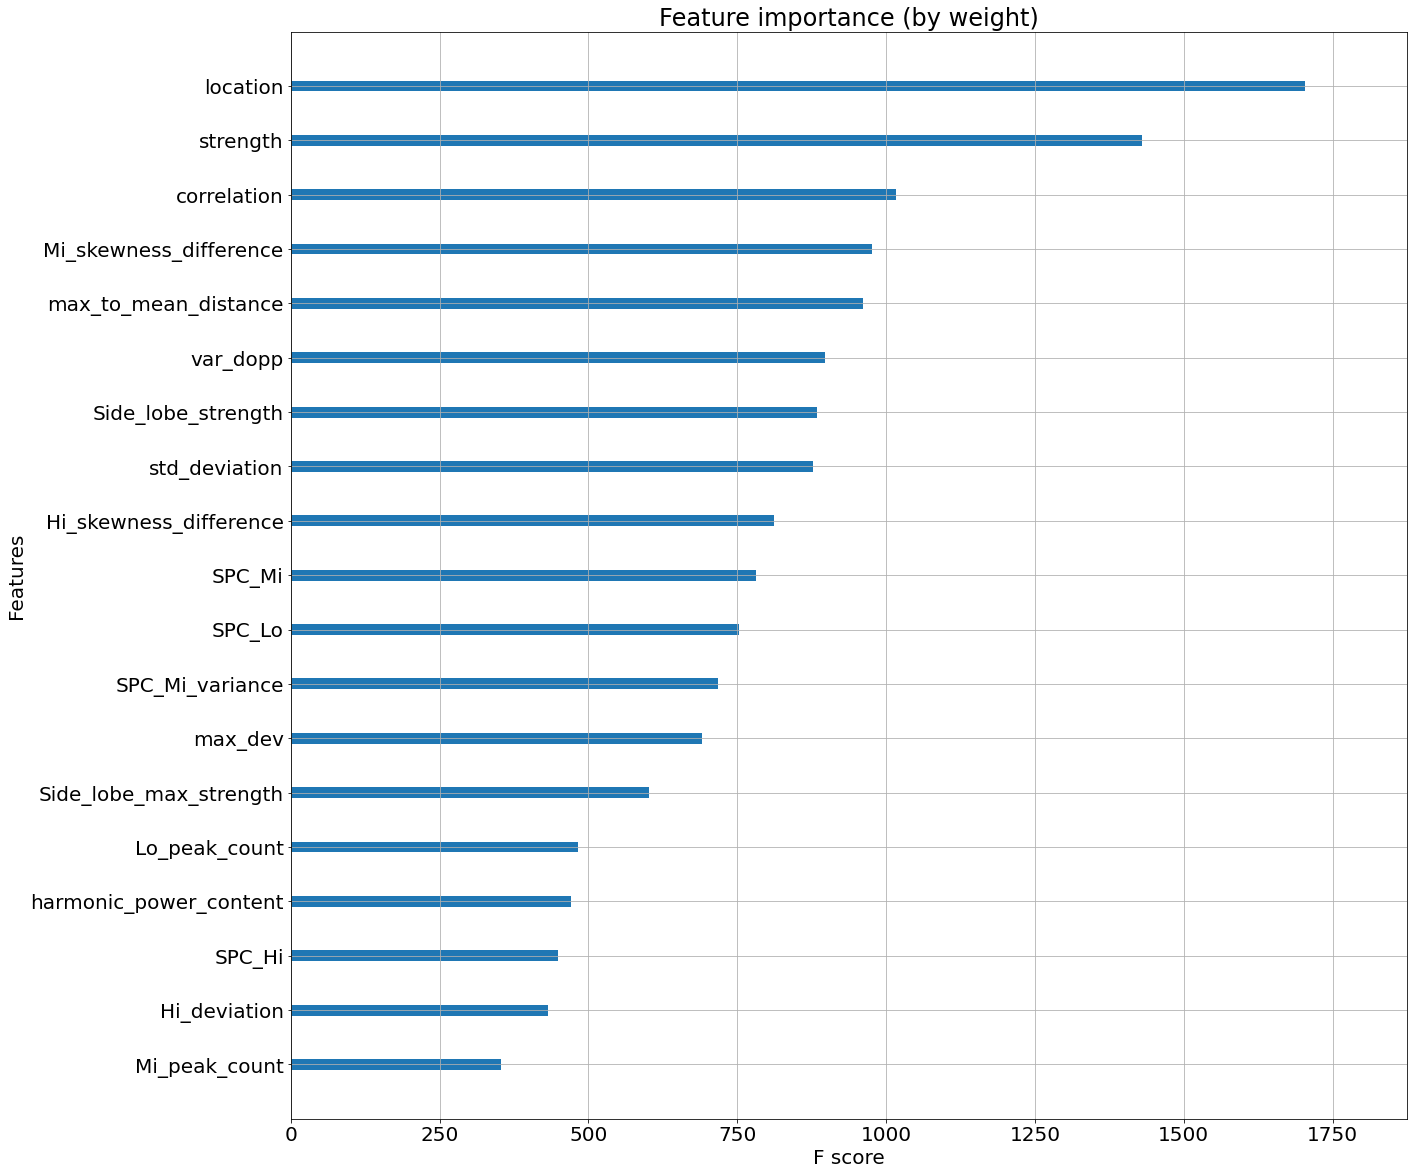

In [13]:
###Get feature importance
importance_type='weight'
fscores = clf.get_booster().get_score(importance_type=importance_type)
feat_importances = []
for ft, score in fscores.items():
    feat_importances.append({'Feature': ft, 'Importance': score, 'Name': feature_names[int(ft[1:])]})
feat_importances = pd.DataFrame(feat_importances)
feat_importances = feat_importances.sort_values(
    by='Importance', ascending=False).reset_index(drop=True)
print(feat_importances)
###Sort labels with feature importance
feat_labels = []
for elem in feat_importances.values:
    feat_labels.append(elem[2])
feat_labels = np.flip(feat_labels)
fig,ax = plt.subplots(1,1,figsize=(20,20))

###Plot importance
importance_plot=plot_importance(clf,ax=ax,importance_type=importance_type,show_values=False)
importance_plot.set_title(f"Feature importance (by {importance_type})")
_=importance_plot.set_yticklabels(feat_labels)

#plt.savefig('Thesis_figures/Feature_importance_weight_complete.png',format='png')

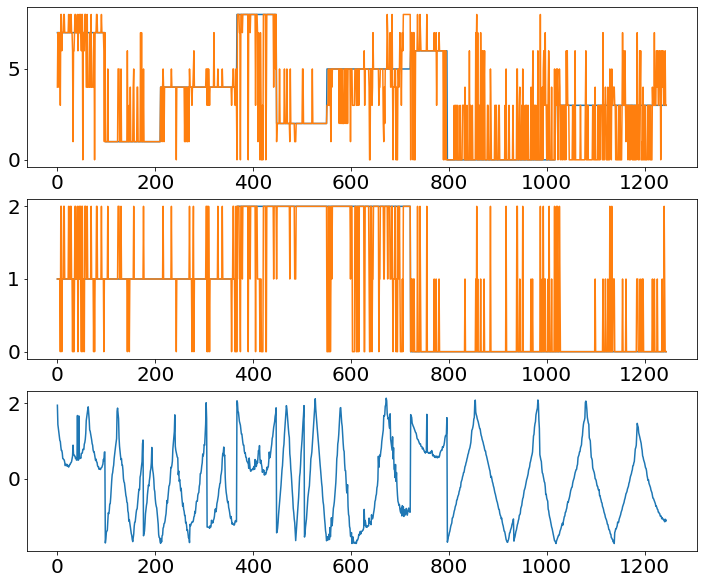

In [17]:
fig,ax = plt.subplots(3,1,figsize=[12,10])
ax[0].plot(y_test)
predictions = clf.predict(X_test[:,overall_best_params_xgb["support"]])
ax[0].plot(predictions)
y_test_converted = []
for y in y_test:
    if y == 0 or y == 3 or y == 6:
        y_test_converted.append(0)
    elif y == 1 or y == 4 or y == 7:
        y_test_converted.append(1)
    elif y == 2 or y == 5 or y == 8:
        y_test_converted.append(2)
        
predictions_converted = []
for pred in predictions:
    if pred == 0 or pred == 3 or pred == 6:
        predictions_converted.append(0)
    elif pred == 1 or pred == 4 or pred == 7:
        predictions_converted.append(1)
    elif pred == 2 or pred == 5 or pred == 8:
        predictions_converted.append(2)
    else:
        (print(pred))

ax[1].plot(y_test_converted)
ax[1].plot(predictions_converted)
ax[2].plot(X_test[:,0])

In [65]:
import random
filter_length = 10
num_classes = 9
buffer = np.zeros((num_classes,filter_length))
filtered_predictions = []
for i in range(len(y_pred)):
    buffer = np.roll(buffer,-1,axis=1)
    buffer[:,-1] = 0
    buffer[y_pred[i],-1] = 1
    buffer_sum = np.sum(buffer,axis=1)
    #max_prob = np.argmax(buffer_sum)
    max_value = np.max(buffer_sum)
    possible_candidates = (buffer_sum == max_value).astype(int)
    if sum(possible_candidates) > 1:
        candidates = []
        for j in range(len(possible_candidates)):
            if possible_candidates[j] == 1:
                candidates.append(j)
        final_choice = np.random.choice(candidates)
    else:
        final_choice = np.argmax(buffer_sum)
    filtered_predictions.append(final_choice)

buffer = np.zeros((num_classes,filter_length))
filtered_test = []
for i in range(len(y_test)):
    buffer = np.roll(buffer,-1,axis=1)
    buffer[:,-1] = 0
    buffer[int(y_test[i]),-1] = 1
    buffer_sum = np.sum(buffer,axis=1)
    #max_prob = np.argmax(buffer_sum)
    max_value = np.max(buffer_sum)
    possible_candidates = (buffer_sum == max_value).astype(int)
    if sum(possible_candidates) > 1:
        candidates = []
        for j in range(len(possible_candidates)):
            if possible_candidates[j] == 1:
                candidates.append(j)
        final_choice = np.random.choice(candidates)
    else:
        final_choice = np.argmax(buffer_sum)
    filtered_test.append(final_choice)

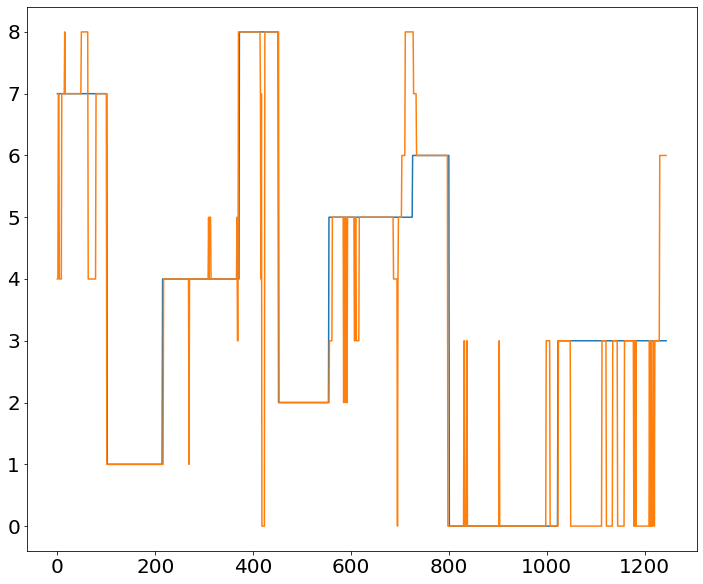

In [66]:
fig,ax = plt.subplots(1,1,figsize=[12,10])
ax.plot(filtered_test)
ax.plot(filtered_predictions)

<ipython-input-67-5dfa6231a3ea>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_xticklabels(['']+['Walking','Biking','Driving'],fontsize=30)
<ipython-input-67-5dfa6231a3ea>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_yticklabels(['']+['Walking','Biking','Driving'],fontsize=30)


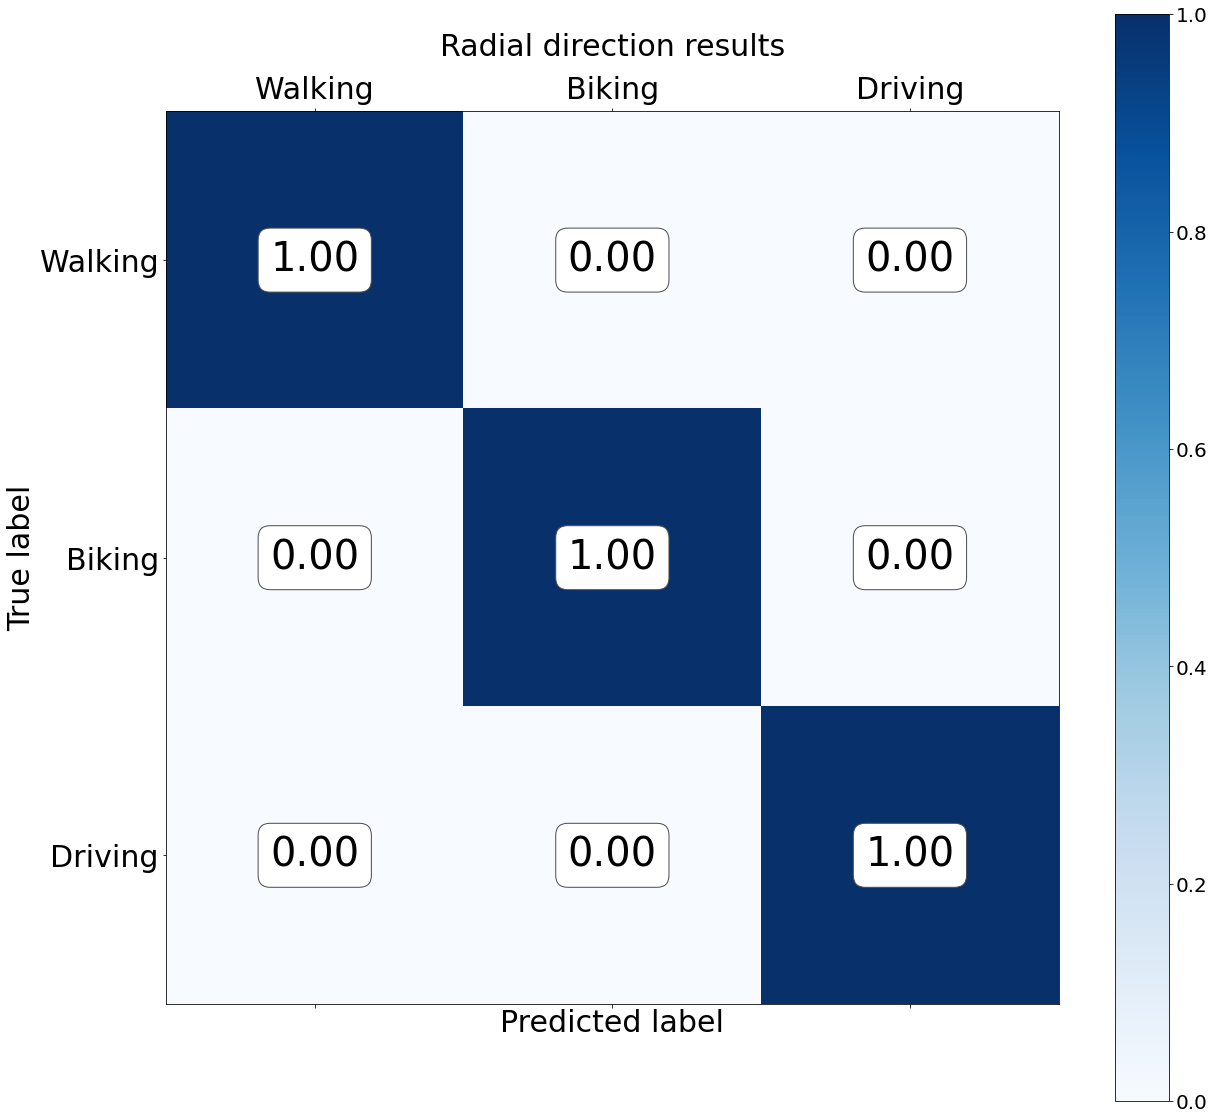

In [67]:
ConfusionMatrix = metrics.confusion_matrix(filtered_test,filtered_predictions, normalize='true')
confusion_results = [[0, 0, 0] for i in range(len(ConfusionMatrix))]
for diag in range(len(ConfusionMatrix)):
    rolled_row = np.roll(ConfusionMatrix[diag],0)
    for column in range(len(ConfusionMatrix)):
        confusion_results[diag][column%3] += rolled_row[column]
fig,ax = plt.subplots(1,1,figsize=(20,20))
radial_results = confusion_results[0:3]
cax = ax.matshow(radial_results, interpolation='nearest',cmap=plt.cm.Blues,norm=mpl.colors.Normalize(vmin=0, vmax=1))
fig.colorbar(cax)

_=ax.set_ylabel('True label',fontsize=30)
_=ax.set_xlabel('Predicted label',fontsize=30)
_=ax.set_title('Radial direction results', fontsize=30, pad=20)
_=ax.set_xticklabels(['']+['Walking','Biking','Driving'],fontsize=30)
_=ax.set_yticklabels(['']+['Walking','Biking','Driving'],fontsize=30)
for (i, j), z in np.ndenumerate(radial_results):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', fontsize=40,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

<ipython-input-68-54d1bff1151b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_xticklabels(['']+['Walking','Biking','Driving'],fontsize=30)
<ipython-input-68-54d1bff1151b>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_yticklabels(['']+['Walking','Biking','Driving'],fontsize=30)


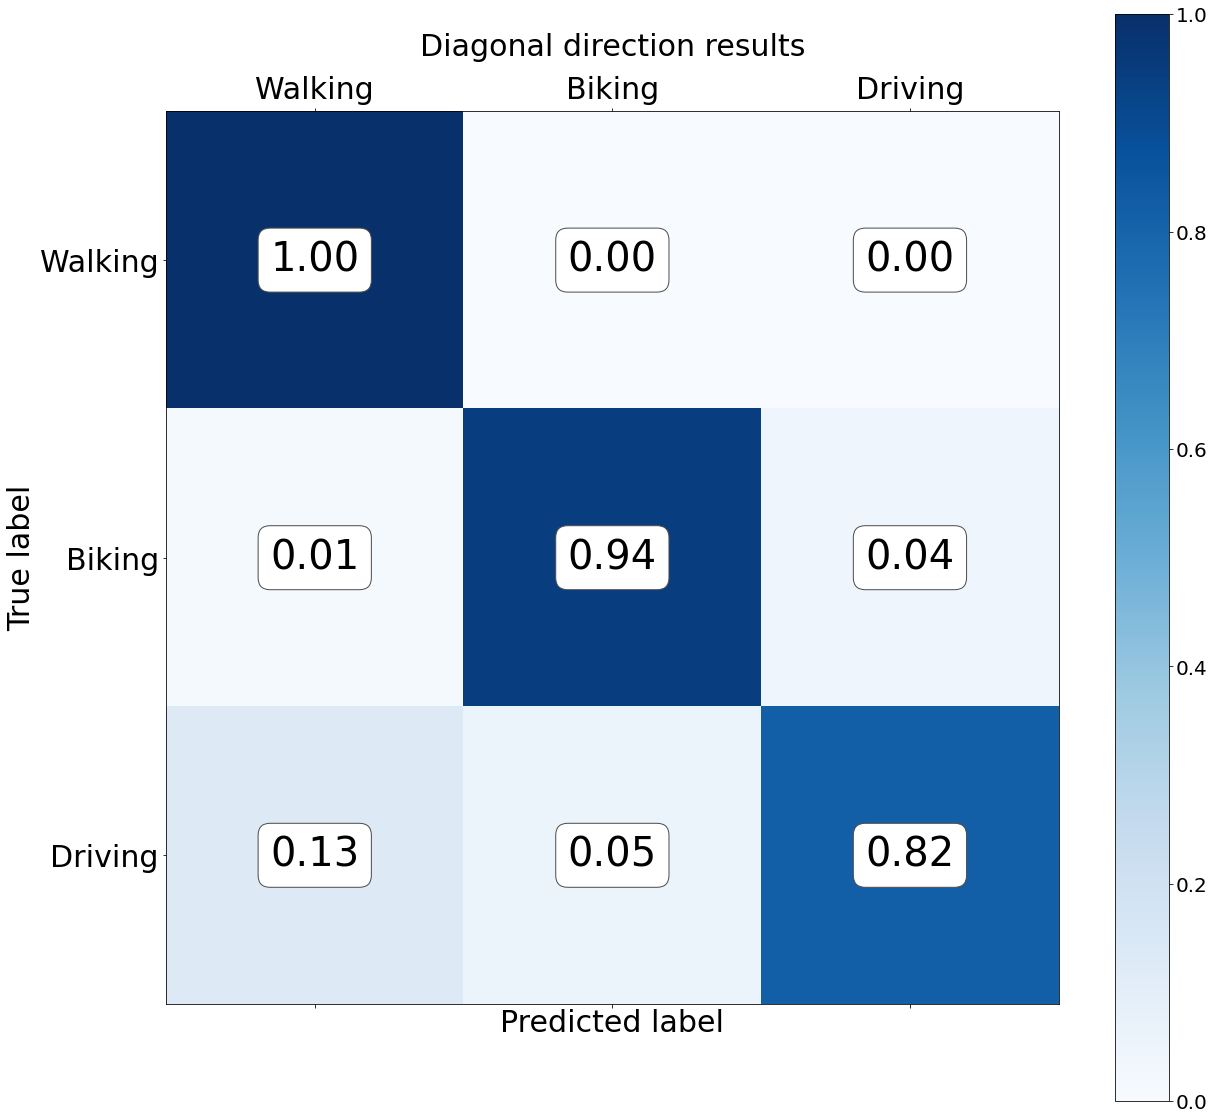

In [68]:
fig,ax = plt.subplots(1,1,figsize=(20,20))
diagonal_results = confusion_results[3:6]
cax = ax.matshow(diagonal_results, interpolation='nearest',cmap=plt.cm.Blues,norm=mpl.colors.Normalize(vmin=0, vmax=1))
fig.colorbar(cax)

_=ax.set_ylabel('True label',fontsize=30)
_=ax.set_xlabel('Predicted label',fontsize=30)
_=ax.set_title('Diagonal direction results', fontsize=30, pad=20)
_=ax.set_xticklabels(['']+['Walking','Biking','Driving'],fontsize=30)
_=ax.set_yticklabels(['']+['Walking','Biking','Driving'],fontsize=30)
for (i, j), z in np.ndenumerate(diagonal_results):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', fontsize=40,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

<ipython-input-69-84bd4ae173fe>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_xticklabels(['']+['Walking','Biking','Driving'],fontsize=30)
<ipython-input-69-84bd4ae173fe>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_yticklabels(['']+['Walking','Biking','Driving'],fontsize=30)


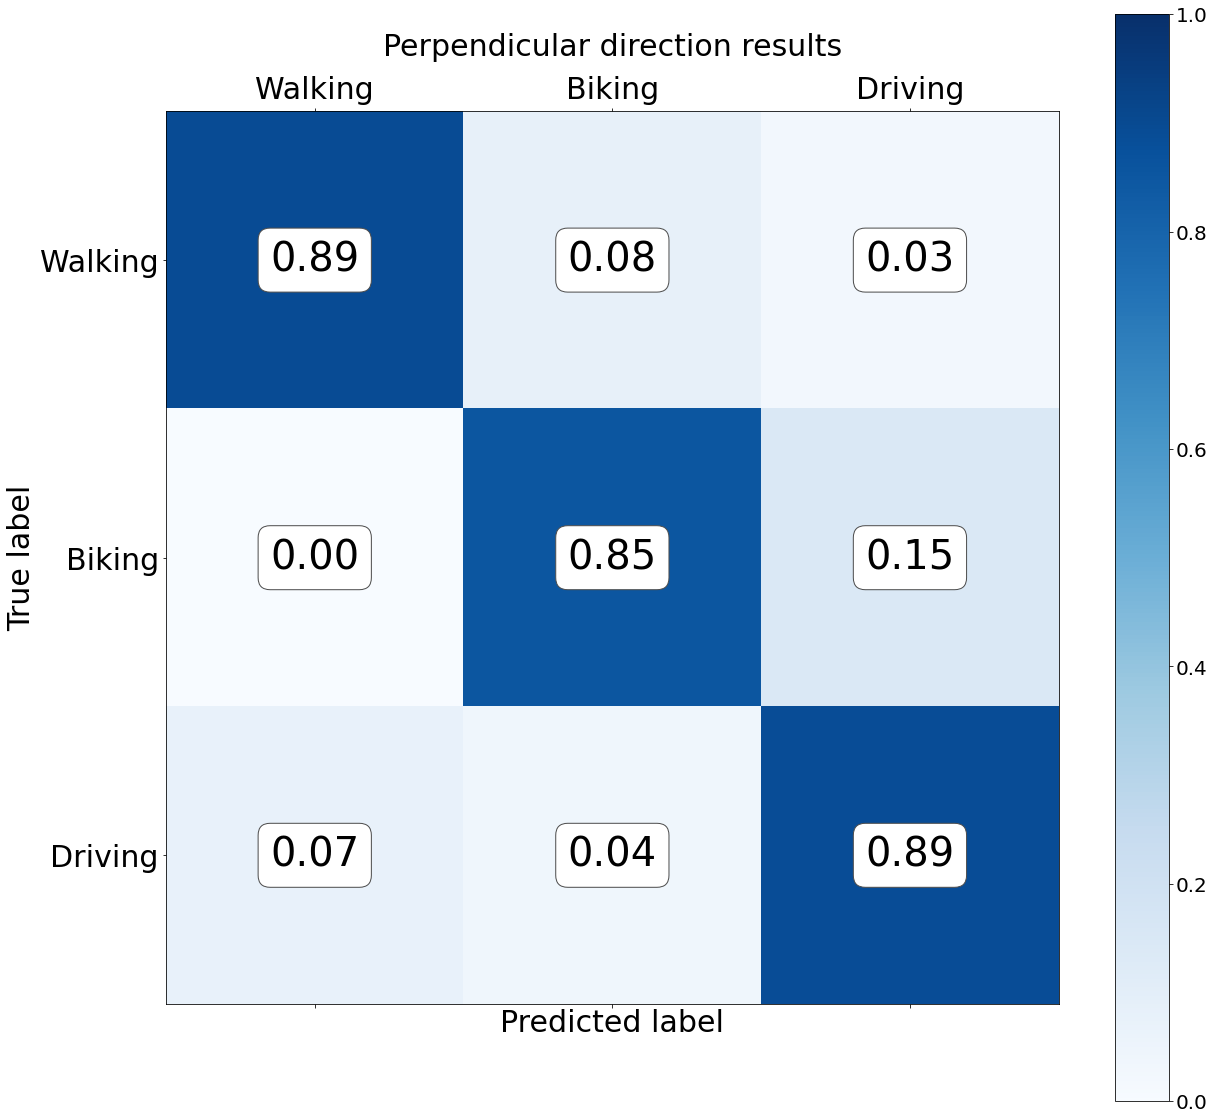

In [69]:
fig,ax = plt.subplots(1,1,figsize=(20,20))
azimuth_results = confusion_results[6:9]
cax = ax.matshow(azimuth_results, interpolation='nearest',cmap=plt.cm.Blues,norm=mpl.colors.Normalize(vmin=0, vmax=1))
fig.colorbar(cax)

_=ax.set_ylabel('True label',fontsize=30)
_=ax.set_xlabel('Predicted label',fontsize=30)
_=ax.set_title('Perpendicular direction results', fontsize=30, pad=20)
_=ax.set_xticklabels(['']+['Walking','Biking','Driving'],fontsize=30)
_=ax.set_yticklabels(['']+['Walking','Biking','Driving'],fontsize=30)
for (i, j), z in np.ndenumerate(azimuth_results):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', fontsize=40,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    